In [1]:
import cv2
import numpy as np
import pandas as pd 
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
print (cv2.__version__)

4.1.2


In [6]:
read_mode = 1 
car_image = cv2.imread('frame2.jpg', read_mode)
#car_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB) #defined a function below to convert from BGR to RGB

In [7]:
 #funstion to show the image and convert back to RGB
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

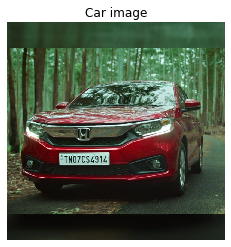

In [8]:
plt_show(car_image,title="Car image")

In [9]:
detector = cv2.CascadeClassifier("xml/indian_license_plate.xml")
plate_coor = detector.detectMultiScale(car_image,scaleFactor=1.3,minNeighbors=7)
print ("Type: " + str(type(plate_coor)))
print (plate_coor)
print ("Length: " + str(len(plate_coor))) 

Type: <class 'numpy.ndarray'>
[[188 477 193  48]]
Length: 1


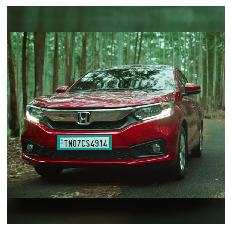

In [10]:
#drawing rectange around number plate
for (x, y, w, h) in plate_coor:
    cv2.rectangle(car_image, (x, y), (x + w, y + h), (150, 150, 0), 8)
plt_show(car_image) 

In [11]:
def cut_plate(frame, plate_coor):
    plate = []
      
    for (x, y, w, h) in plate_coor:
        w_rm = int(0.09 * w / 15)
        plate.append(frame[y: y + h, x + w_rm: x + w - w_rm])
         
    return plate


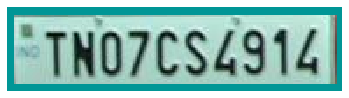

In [12]:
ROI = cut_plate(car_image, plate_coor)
plt_show(ROI[0])


In [13]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [14]:
#converting into gray scale
gray = cv2.cvtColor(ROI[0], cv2.COLOR_BGR2GRAY)

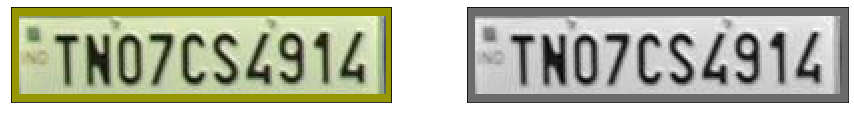

In [15]:
plot_images(ROI[0], gray)

In [16]:
#bluring the image
blur = cv2.bilateralFilter(gray, 11,90, 90)

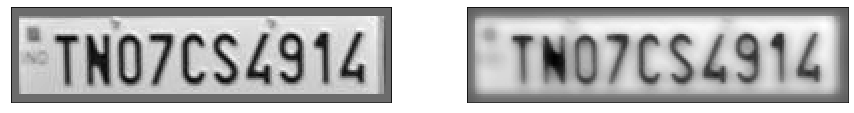

In [17]:
plot_images(gray, blur)

In [18]:
#edge detection
edges = cv2.Canny(blur, 30, 200)

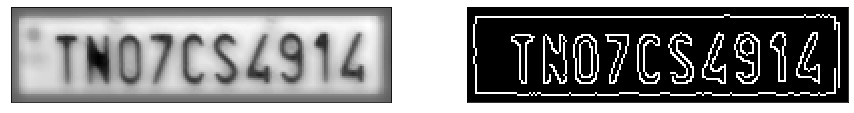

In [19]:
plot_images(blur, edges)

In [52]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
from pytesseract import image_to_string
from imutils import contours

In [53]:
import pytesseract
text = pytesseract.image_to_string(ROI[0], lang='eng')

print(text)

“TNO7CS4914 |


In [54]:
AC = pd.read_csv('Authorized_cars.csv')

In [55]:
AC.head()

,V_number
0,AP37H6699


In [56]:
tt = "AP37H6699"

In [59]:
result = AC['V_number'].str.contains(tt)

In [60]:
print(result)

0    True
Name: V_number, dtype: bool


# Things to do 
1. Try live feed
2. More preprocessing
3. Print result on screen